## 2. Translation im zweidimensionalen Kasten
Die Bewegunsgleichung lautet:

$$
-\underbrace{\left( \frac{\partial^2 \Psi(x,y)}{\partial x^2} + \frac{\partial^2 \Psi(x,y)}{\partial y^2} \right)}_{=\hat{T}\Psi(x,y)} + \hat{U}\Psi(x,y) = E\Psi(x,y)
$$

Als Ansatz wählen wir für das Potential $U_{xy}(x,y)$:

$$
U_{xy}(x,y) = U_x(x) + U_y(y) =    
    \begin{cases}
      0, & \text{für }\  0 \leq x \cap y \leq L \\
      \infty, & \text{für}\ (x < 0, (x \cap y)  > L) 
    \end{cases}
$$

Daraus folgt, dass wir die Lösung dieser Differentialgleichung als Produkt einzelner Wellenfunktionen darstellen können:

$$
\Psi(x,y) = \psi_x(x) \cdot \psi_x(y)
$$

Setzen wir dies in die SG ein, folgt:

$$
\left(\underbrace{\hat{H}_x}_{=\hat{T}_x + \hat{U}_x} + \underbrace{\hat{H}_y}_{=\hat{T}_x + \hat{U}_x} \right) \left(\psi_x(x) \cdot \psi_y(y)\right) = E\left(\psi_x(x) \cdot \psi_y(y)\right)
$$

Dieser Hamilton-Operator ist linear und distributiv:

$$
\hat{H}_x \psi_x(x)\psi_y(y) + \hat{H}_y \psi_x(x)\psi_y(y) = E \psi_x(x)\psi_y(y) \\
$$

Dies kommutiert zu:

$$
\psi_y(y)\cdot \hat{H}_x \psi_x(x) + \psi_x(x)\cdot \hat{H}_y\psi_y(y) = E \psi_x(x)\psi_y(y) \\
$$

Die einzelnen Operatoren wirken dabei nur auf die einzelne Wellenfunktion:

$$
\psi_y(y)\cdot \varepsilon_x \psi_x(x) + \psi_x(x)\cdot \varepsilon_y\psi_y(y) = E \psi_x(x)\psi_y(y) \\
\left( \varepsilon_x + \varepsilon_y\right) \psi_x(x)\psi_y(y) = E \psi_x(x)\psi_y(y)
$$

Da $\varepsilon_x$, $\varepsilon_y$ und $E$ Konstanten sind, vereinfacht sich durch Normierung $\int_0^\infty |\psi_x(x)\psi_y(y)|^2 d\tau = 1$:

$$
\varepsilon_x + \varepsilon_y = E
$$

Die Lösung jeder einzelnen Wellenfunktion $\psi_i(i)$ entspricht somit der Lösung des Teilchens im 1D Kasten. Die gesamte Wellenfunktion ist als Produkt gegeben:

$$
\Psi_{x,y}(x,y) = \frac{2}{\sqrt{L_x L_y}}\sin\left(\frac{n_x \pi x}{L_x}\right)\sin\left(\frac{n_y \pi y}{L_y}\right)
$$

Und die Gesamtenergie als:

$$
E = \frac{h n_x^2}{8mL_x^2} + \frac{h n_y^2}{8mL_y^2}
$$

### b) Skizzieren der Lösungen

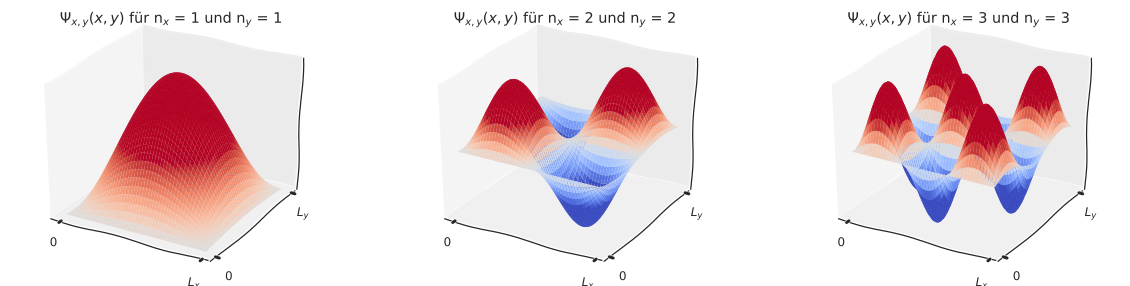

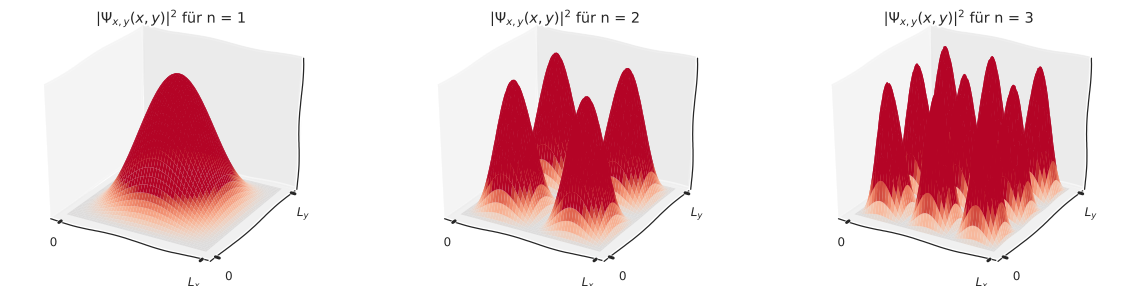

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import cm
import math
plt.xkcd()
plt.style.use("seaborn-ticks")
plt.rcParams["legend.handlelength"] = 0.8
plt.rcParams["legend.framealpha"] = 0.8
plt.rcParams.update({"font.size": 12})

n = np.array([1, 2, 3])
x = y = np.arange(0, 100)
X, Y = np.meshgrid(x, y)

def energy(nx, Lx, ny, Ly):
    return nx ** 2 / (8 * Lx ** 2) + ny ** 2 / (8 * Ly ** 2)

def wavefunction(x, y, nx, ny, Lx, Ly):
    return 2/np.sqrt(Lx*Ly) * np.sin(x * math.pi * nx / Lx) *np.sin(y * math.pi * ny / Ly)

def square_wavefunction(x,y,nx,ny,Lx,Ly):
    return wavefunction(x,y,nx,ny,Lx,Ly) ** 2

fig = plt.figure(figsize=(20,5))
for i in n:
    ax = fig.add_subplot(1, 3, i, projection='3d')
    zs = np.array(wavefunction(np.ravel(X), np.ravel(Y), i, i, 100, 100))
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, norm = colors.Normalize(vmin=-0.01,vmax=0.01))
    ax.set_title("$\Psi_{{x,y}}(x,y)$ für n$_x$ = {} und n$_y$ = {}".format(i, i))
    ax.set_xticklabels([0, "$L_x$"])
    ax.set_xticks([0, 100])
    ax.set_yticklabels([0, "$L_y$"])
    ax.set_yticks([0, 100])
    ax.set_zticks([])
    ax.set_zticklabels([])

fig = plt.figure(figsize=(20,5))
for i in n:
    ax = fig.add_subplot(1, 3, i, projection='3d')
    zs = np.array(square_wavefunction(np.ravel(X), np.ravel(Y), i, i, 100, 100))
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, norm = colors.Normalize(vmin=-0.0001,vmax=0.0001))
    ax.set_title("$|\Psi_{{x,y}}(x,y)|^2$ für n = {}".format(i))
    ax.set_xticklabels([0, "$L_x$"])
    ax.set_xticks([0, 100])
    ax.set_yticklabels([0, "$L_y$"])
    ax.set_yticks([0, 100])
    ax.set_zticks([])
    ax.set_zticklabels([])    

plt.show()

Die Wellenfunktionen im zweidimensionalen Kasten für $L_x \neq L_y$ sind äquivalent, nur etwas verzerrt:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import cm
import math
plt.xkcd()
plt.style.use("seaborn-ticks")
plt.rcParams["legend.handlelength"] = 0.8
plt.rcParams["legend.framealpha"] = 0.8
plt.rcParams.update({"font.size": 12})

n = np.array([1, 2, 3])
x = np.arange(0, 100)
y = np.arange(0, 500)
X, Y = np.meshgrid(x, y)

def energy(nx, Lx, ny, Ly):
    return nx ** 2 / (8 * Lx ** 2) + ny ** 2 / (8 * Ly ** 2)

def wavefunction(x, y, nx, ny, Lx, Ly):
    return 2/np.sqrt(Lx*Ly) * np.sin(x * math.pi * nx / Lx) *np.sin(y * math.pi * ny / Ly)

def square_wavefunction(x,y,nx,ny,Lx,Ly):
    return wavefunction(x,y,nx,ny,Lx,Ly) ** 2
fig = plt.figure(figsize=(20,5))
for i in n:
    ax = fig.add_subplot(1, 3, i, projection='3d')
    zs = np.array(wavefunction(np.ravel(X), np.ravel(Y), i, i, 100, 500))
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, norm = colors.Normalize(vmin=-0.005,vmax=0.005))
    ax.set_title("$\Psi_{{x,y}}(x,y)$ für n = {}".format(i))
    ax.set_xticklabels([0, "$L_x$"])
    ax.set_xticks([0, 100])
    ax.set_yticklabels([0, "$L_y$"])
    ax.set_yticks([0, 500])
    ax.set_zticks([])    
    ax.set_zticklabels([])
    ax.set_xlim([-250, 250])

plt.show()

#### 3D-Kasten

Ohne Herleitung gilt, dass auch die Lösungen des dreidimensionalen Kastens unabhängig voneinander ebene Wellen in jeder Raumrichtung sind. Diese sind nur schwieriger darzustellen, da wir die Amplitude in Abhängigkeit von drei Koordinaten zeigen müssen, also eine vier-dimensionale Darstellung bräuchten. Man kann daher nur Isoflächen zeigen, auf denen die Amplitude konstant gehalten wird.

Der folgende Code erzeugt diese Visualisierung mit Plotly (ggf. kann die Darstellung etwas Zeit in Anspruch mehmen). Sie können mit den Quantenzahlen $n_x, n_y$ und $n_z$ herumspielen, um verschiedene Orbitale des mehrdimensionalen Kastens anzuzeigen.

In [3]:
%matplotlib inline
import numpy as np
from numpy import cos, pi
import math
from ipywidgets import interact
import plotly.graph_objects as go

x = np.linspace(0, 20, 50)
y = np.linspace(0, 20, 50)
z = np.linspace(0, 20, 50)
X, Y, Z = np.meshgrid(x, y, z)
L = 20

def wavefunction(x, y, z, nx, ny, nz):
    return np.sin(x * math.pi * nx / L) * np.sin(y * math.pi * ny / L) * np.sin(z * math.pi * nz / L)

def show_figure(nx=1, ny=1, nz=1):    
    print("Die Visualisierung kann ein paar Sekunden in Anspruch nehmen.")
    values = wavefunction(X, Y, Z, nx, ny, nz)
    fig = go.Figure(data=go.Isosurface(
        x=X.flatten(),
        y=Y.flatten(),
        z=Z.flatten(),
        value=values.flatten(),
        isomin=-0.5,
        isomax=0.5,
        opacity=0.5,
        surface_count=2,
        colorscale='BlueRed',
        caps=dict(x_show=False, y_show=False, z_show=False)
        ),
        layout=go.Layout(title=r"$\Psi_{{{}{}{}}}(x,y,z)$".format(nx, ny, nz))) 
    fig.show()

interact(show_figure, nx=(1,5,1), ny=(1,5,1), nz=(1,5,1))

interactive(children=(IntSlider(value=1, description='nx', max=5, min=1), IntSlider(value=1, description='ny',…

<function __main__.show_figure(nx=1, ny=1, nz=1)>

### c) Normierung

Die Wellenfunktion ist normiert:

$$
\begin{aligned}
\int_{x=0}^{L_x} \int_{y=0}^{L_y} \left| \Psi_{x,y}(x,y) \right|^2 dx dy 
    &= \int_{x=0}^{L_x} \left| \psi_x(x) \right|^2 dx \cdot \int_{y=0}^{L_y} \left| \psi_y(y) \right|^2 dy \\
&= \frac{4}{L_x L_y} \left[\frac{L_x}{2} -\frac{\sin(2\pi n_x x /L_x)}{4 \pi n_x/L_x} \right]_0^{L_x}
\left[\frac{L_y}{2} -\frac{\sin(2\pi n_y y /L_y)}{4 \pi n_y/L_y} \right]_0^{L_y} \\
&= \frac{4}{L_x L_y} \frac{L_x}{2}\frac{L_y}{2}\\
&= 1
\end{aligned}
$$
